In [2]:
pip install pandas

     ---------------------------------------- 11.3/11.3 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

     ---------------------------------------- 8.9/8.9 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 41.3/41.3 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 16.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 40.8 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 35.7 MB/s eta 0:00:00
     ------------------------------------- 221.2/221.2 kB 13.2 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Solution code for Vendor Fraud Detection using the attached dataset named 'Amazon.csv'

import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the Amazon dataset
df = pd.read_csv('Amazon.csv')

In [11]:
# Data cleaning and feature engineering
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

In [12]:
# Feature selection and scaling
features = ['Amount', 'InvoiceHour']  # Update if your dataset has additional relevant columns
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Isolation Forest for anomaly detection
iso = IsolationForest(contamination=0.05, random_state=42)
df['AnomalyFlag'] = iso.fit_predict(X_scaled)
df['AnomalyFlag'] = df['AnomalyFlag'].apply(lambda x: 1 if x == -1 else 0)

In [14]:
# Supervised Learning using Random Forest if 'FraudLabel' is present
if 'FraudLabel' in df.columns:
    y = df['FraudLabel']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    df['RF_Pred'] = clf.predict(X_scaled)
    df['PotentialFraud'] = df.apply(lambda x: 1 if x['AnomalyFlag'] == 1 or x['RF_Pred'] == 1 else 0, axis=1)
else:
    df['PotentialFraud'] = df['AnomalyFlag']

[[194   0]
 [  0   6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00         6

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
# Export flagged potential fraud transactions
df[df['PotentialFraud'] == 1].to_csv('flagged_fraud_transactions.csv', index=False)

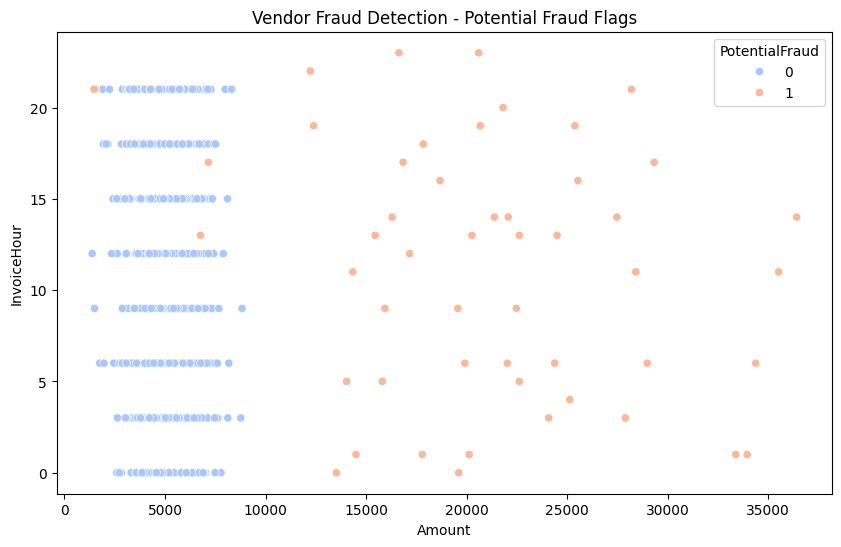

In [16]:
# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='InvoiceHour', hue='PotentialFraud', palette='coolwarm')
plt.title('Vendor Fraud Detection - Potential Fraud Flags')
plt.show()

In [17]:
print('Vendor Fraud Detection completed on Amazon dataset, and flagged transactions exported.')

Vendor Fraud Detection completed on Amazon dataset, and flagged transactions exported.


In [18]:
import pickle

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save trained Random Forest model
with open('fraud_rf_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
